<h1>Using sklearn module</h1>

In [43]:
# importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Different ways of loading data in sklearn module</h2>

* make_blobs()

* sklearn.datasets

In [2]:
# artificially creating the data

from sklearn.datasets import make_blobs
data = make_blobs(n_samples=10, centers=3, cluster_std=0.5, n_features=2, random_state=42)
print(data)

(array([[-6.14680281, -6.99299774],
       [-7.15181855, -6.8246483 ],
       [ 4.13346328,  2.13029335],
       [-6.84586309, -7.59248369],
       [-2.38821649,  8.05764601],
       [-2.74393482,  9.28556615],
       [-1.71959122,  9.39800349],
       [ 3.77741992,  1.69202592],
       [ 4.1858668 ,  1.26701783],
       [-2.74090647,  8.78142125]]), array([2, 2, 1, 2, 0, 0, 0, 1, 1, 0]))


<AxesSubplot:>

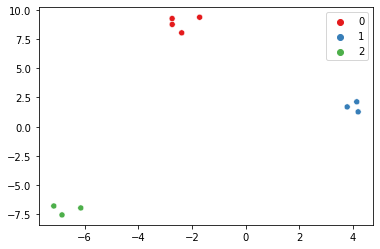

In [3]:
# scatterplot of the data artificially data

sns.scatterplot(x=data[0][:,0],y=data[0][:,1], hue= data[1], palette= 'Set1')

# Since center = 3 it creates 3 centroids with 3 target values
# lower the cluster_std lesser the wide spread will be the data

In [4]:
from sklearn.datasets import load_iris
df_2 = load_iris()
print(df_2.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
print(df_2.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
# Data in the iris dataset

print(df_2.data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [7]:
# feature names in the iris dataset

print(df_2.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<h2>Preprocessing Data</h2>

In [8]:
# importing the data

df = pd.read_csv("C:\\Users\\mithun\\Downloads\\titanictrain.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# dropping unneccessary features
df.drop(['Cabin','Name'],axis=1,inplace=True)

<AxesSubplot:>

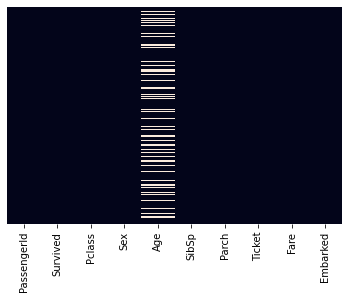

In [10]:
# to check for NaN values

sns.heatmap(df.isna(), yticklabels=False, cbar=False)

# there are missing values present in Age, Embarked and Cabin feature, each tick shows each missing value

In [11]:
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "mean")
imputer.fit(df.drop(['Sex','Ticket','Embarked'], axis = 1))
data = imputer.transform(df.drop(['Sex','Ticket','Embarked'], axis = 1))

In [14]:
# mean values of the Age columns which is to be filled
imputer.statistics_[3]

29.69911764705882

In [15]:
df_1 = pd.DataFrame(data,columns=['PassengerId', 'Survived', 'Pclass','Age', 'SibSp', 'Parch', 'Fare'])
df_1[:5]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500


In [16]:
# numerical features missing values are imputed with mean value

df_1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [17]:
df['Embarked'].value_counts()

# C = Cherbourg, Q = Queenstown, S = Southampton

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
imputer = SimpleImputer(strategy = "most_frequent")
data2 = imputer.fit_transform(df)

In [19]:
df_2 = pd.DataFrame(data2,columns=df.columns)
df_2[:5]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.25,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.925,S
3,4,1,1,female,35.0,1,0,113803,53.1,S
4,5,0,3,male,35.0,0,0,373450,8.05,S


In [20]:
# All the features

df_2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
df_2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.25,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.925,S
3,4,1,1,female,35.0,1,0,113803,53.1,S
4,5,0,3,male,35.0,0,0,373450,8.05,S


In [22]:
# converting categorical value to numerical value

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
col1 = encoder.fit_transform(df_2['Sex'])
col2 = encoder.fit_transform(df_2['Embarked'])
df_2['sex'] = col1
df_2['embarked'] = col2

In [23]:
df_2.drop(['Sex','Embarked','Ticket'],axis=1,inplace=True)

In [24]:
df_2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex,embarked
0,1,0,3,22.0,1,0,7.25,1,2
1,2,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,26.0,0,0,7.925,0,2
3,4,1,1,35.0,1,0,53.1,0,2
4,5,0,3,35.0,0,0,8.05,1,2


In [25]:
# Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_2.drop('Survived',axis=1))

In [26]:
df_feat = pd.DataFrame(scaled_features, columns = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'sex', 'embarked'])
df_feat.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,sex,embarked
0,-1.730108,0.827377,-0.497793,0.432793,-0.473674,-0.502445,0.737695,0.585954
1,-1.726220,-1.566107,0.715048,0.432793,-0.473674,0.786845,-1.355574,-1.942303
2,-1.722332,0.827377,-0.194583,-0.474545,-0.473674,-0.488854,-1.355574,0.585954
3,-1.718444,-1.566107,0.487640,0.432793,-0.473674,0.420730,-1.355574,0.585954
4,-1.714556,0.827377,0.487640,-0.474545,-0.473674,-0.486337,0.737695,0.585954


<h2>Training and Testing ML Algorithms</h2>

In [27]:
X = df_feat            # feature matrix
y = df['Survived']   # target array

In [28]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [29]:
print("Shape of Training data of features: ", X_train.shape)
print("Shape of testing data of features: ", X_test.shape)
print("Shape of Training data of target: ", y_train.shape)
print("Shape of testing data of target: ", y_test.shape)

Shape of Training data of features:  (623, 8)
Shape of testing data of features:  (268, 8)
Shape of Training data of target:  (623,)
Shape of testing data of target:  (268,)


In [30]:
# building a model

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)  # k=1
model.fit(X_train.values,y_train.values)

KNeighborsClassifier(n_neighbors=1)

In [31]:
pred = model.predict(X_test.values)
print(pred[:5])

[1 0 0 1 0]


In [32]:
# model evaluation metrics

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[126  31]
 [ 30  81]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       157
           1       0.72      0.73      0.73       111

    accuracy                           0.77       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.77      0.77      0.77       268



<h2>Hyper Parameter Tuning </h2>

In [33]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train.values, y_train.values)
    pred_i = knn.predict(X_test.values)
    error_rate.append(np.mean(pred_i != y_test))   # average error rate

Text(0, 0.5, 'Error rate ----->')

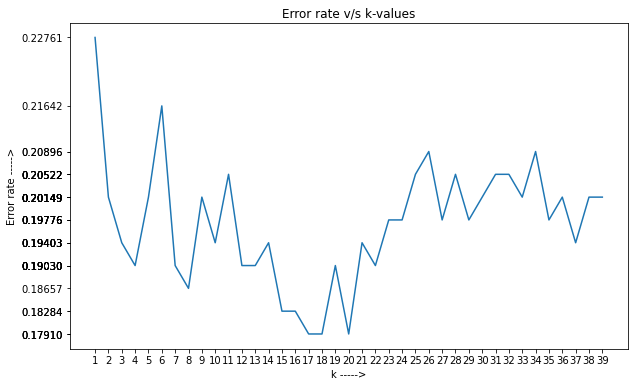

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate)
plt.xticks(range(1,40))
plt.yticks(error_rate)
plt.title("Error rate v/s k-values")
plt.xlabel("k ----->")
plt.ylabel("Error rate ----->")

* k = 17 is the elbow point and has lower error rate, so it is the better k value in the model

In [35]:
knn_final = KNeighborsClassifier(n_neighbors=17)
knn_final.fit(X_train.values, y_train.values)
pred_final = knn_final.predict(X_test.values)

In [36]:
print(confusion_matrix(y_test, pred_final))
print(classification_report(y_test, pred_final))

[[140  17]
 [ 31  80]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       157
           1       0.82      0.72      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



* Now, we see that accuracy got improved from 77% to 82% after hyper parameter tuning

In [37]:
# grid search CV

from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':[10,15,16,17,18,20,25],
             'weights':['uniform','distance'],
             'metric':['minkowski','euclidean','manhattan'],
             'leaf_size':[10,20,30]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose=3)

In [38]:
grid.fit(X_train.values, y_train.values)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
[CV 1/5] END leaf_size=10, metric=minkowski, n_neighbors=10, weights=uniform;, score=0.784 total time=   0.0s
[CV 2/5] END leaf_size=10, metric=minkowski, n_neighbors=10, weights=uniform;, score=0.872 total time=   0.0s
[CV 3/5] END leaf_size=10, metric=minkowski, n_neighbors=10, weights=uniform;, score=0.760 total time=   0.0s
[CV 4/5] END leaf_size=10, metric=minkowski, n_neighbors=10, weights=uniform;, score=0.766 total time=   0.0s
[CV 5/5] END leaf_size=10, metric=minkowski, n_neighbors=10, weights=uniform;, score=0.863 total time=   0.0s
[CV 1/5] END leaf_size=10, metric=minkowski, n_neighbors=10, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END leaf_size=10, metric=minkowski, n_neighbors=10, weights=distance;, score=0.824 total time=   0.0s
[CV 3/5] END leaf_size=10, metric=minkowski, n_neighbors=10, weights=distance;, score=0.768 total time=   0.0s
[CV 4/5] END leaf_size=10, metric=minkowski, n_neighbo

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [10, 15, 16, 17, 18, 20, 25],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [39]:
grid.best_params_

{'leaf_size': 10,
 'metric': 'manhattan',
 'n_neighbors': 20,
 'weights': 'uniform'}

In [40]:
grid.best_estimator_

KNeighborsClassifier(leaf_size=10, metric='manhattan', n_neighbors=20)

In [41]:
grid_pred = grid.predict(X_test.values)

In [42]:
print(confusion_matrix(y_test,grid_pred))
print(classification_report(y_test,grid_pred))

[[143  14]
 [ 36  75]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       157
           1       0.84      0.68      0.75       111

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.81      0.81       268



* this is another method of hyper parameter tuning using Grid search, where we got better performance from 77% to 81%